In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
df=pd.read_csv(r"D:\Downloads\homeprices_banglore.csv")
df.sample(5)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Downloads\\homeprices_banglore.csv'

In [ ]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_X=sx.fit_transform(df.drop('price',axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [ ]:
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [ ]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    no_of_features=X.shape[1]
    w=np.ones(shape=(no_of_features))
    b=0
    total_samples=X.shape[0]

    cost_list=[]
    epochs_list=[]

    for i in range(epochs):
        y_predicted=np.dot(w,scaled_X.T)+b

        w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        

        cost=np.mean(np.square(y_true-y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epochs_list.append(i)
    return w,b,cost,cost_list,epochs_list




In [ ]:
w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

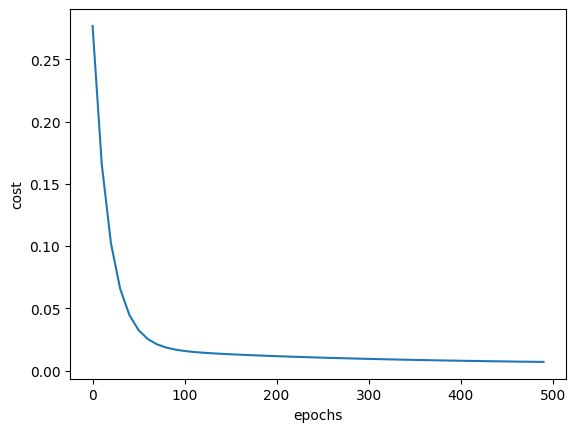

In [ ]:
plt.xlabel("epochs")
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [ ]:
def predict(area,bedrooms,w,b):
    scaled_x=sx.transform([[area,bedrooms]])
    scaled_price=w[0]*scaled_x[0][0]+w[1]*scaled_x[0][1]+b
    return sy.inverse_transform([[scaled_price]])

predict(2600,4,w,b)   

d:\arunv\Pranav\Python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.45484403]])

In [ ]:
predict(1000,2,w,b)   

d:\arunv\Pranav\Python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[30.25309446]])

In [ ]:
import random
def mini_batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    no_of_features=X.shape[1]
    w=np.ones(shape=(no_of_features))
    b=0
    total_samples=X.shape[0]

    cost_list=[]
    epochs_list=[]

    for i in range(epochs):
        m=random.randint(10,total_samples/2)
        batch_x=np.zeros((m,2))
        batch_y=np.zeros((m,))
        for j in range(m):
            n=random.randint(0,total_samples-1)
            batch_x[j]=X[n]
            batch_y[j]=y_true[n]


        y_predicted=np.dot(w,batch_x.T)+b

        w_grad=-(2/total_samples)*(batch_x.T.dot(batch_y-y_predicted))
        b_grad=-(2/total_samples)*np.sum(batch_y-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        

        cost=np.mean(np.square(batch_y-y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epochs_list.append(i)
    return w,b,cost,cost_list,epochs_list

In [ ]:
w,b,cost,cost_list,epoch_list=mini_batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),1000)
w,b,cost

(array([0.70782823, 0.67575252]), -0.22951017594431375, 0.0025162814934257525)

In [ ]:
predict(1000,2,w,b)   

d:\arunv\Pranav\Python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[30.41289883]])

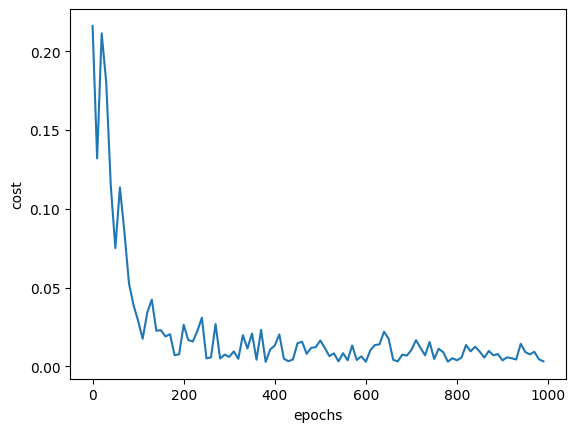

In [ ]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)